***Importamos las librerias necesarias para hacer el modelo***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statistics import LinearRegression
import missingno as msno
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


***Leemos los datasets test, train***

In [2]:
df_train = pd.read_csv('properties_colombia_train.csv')
df_test = pd.read_csv('properties_colombia_test.csv')

 ***Vemos las cinco primeras filas de los csv***

In [4]:
df_train.head(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)


In [5]:
df_test.head(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722000,-74.075000,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY
2,119504,FbWRxZOMNoUzVOLXgkum1A==,Propiedad,2020-10-20,2020-10-22,2020-10-20,6.259253,-75.628381,Colombia,Antioquia,...,1.0,NaN,NaN,COP,NaN,Casa Barata San Javier Solo por este mes,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta,POINT (-75.6283806 6.25925267)


***Hacemos un shape para saber cuantas filas y columnas tenemos en cada dataset***
Se observará cómo se distribuyen los datos de la variable a predecir

(197549, 27)


<AxesSubplot:>

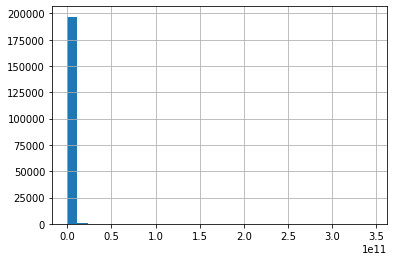

In [6]:
print(df_train.shape)
df_train.price.hist(bins=30)

In [7]:
df_test.shape

(65850, 26)

***Utilizando la librería missingno podemos ver si hay valores nulos en la información a través de una visualización*** 

<AxesSubplot:>

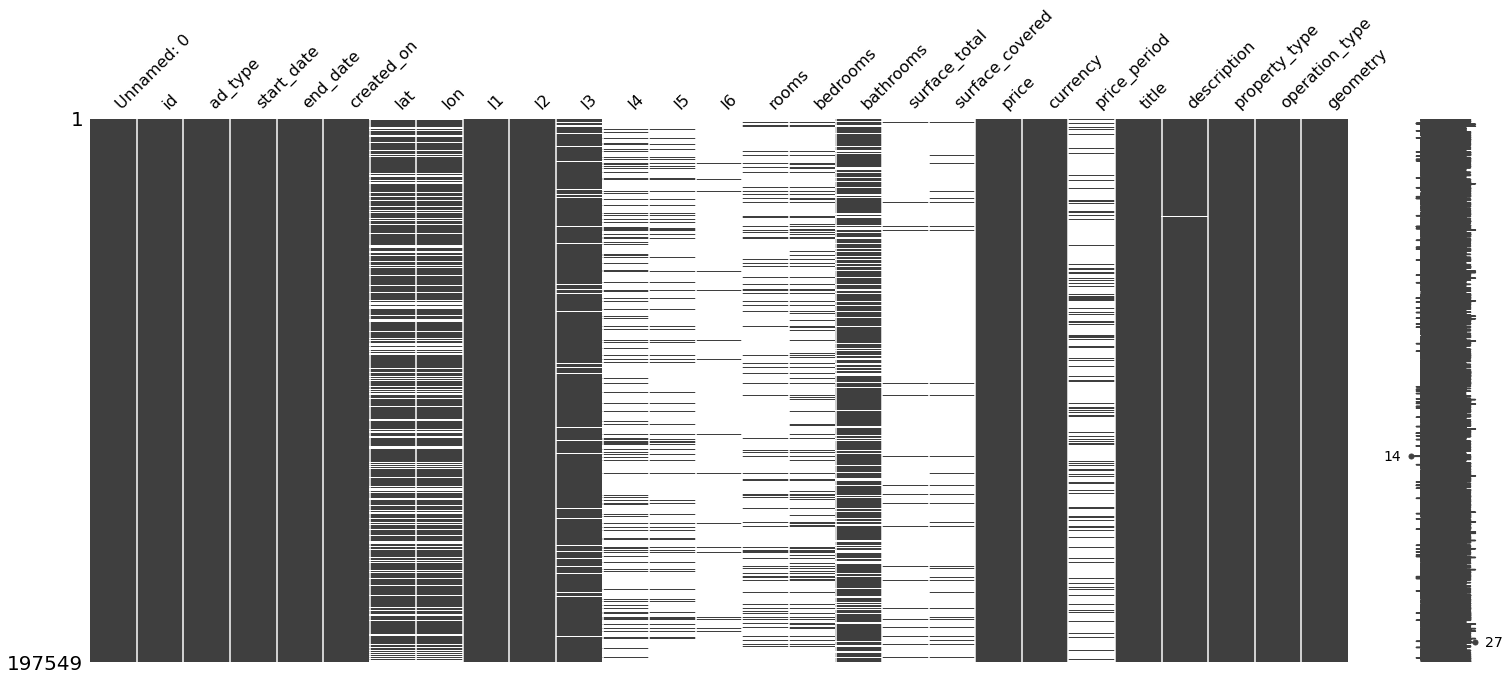

In [8]:
msno.matrix(df_train)
#podemos obsevar que de 27 columnas 14 son las que tienen los 197549 registros

<AxesSubplot:>

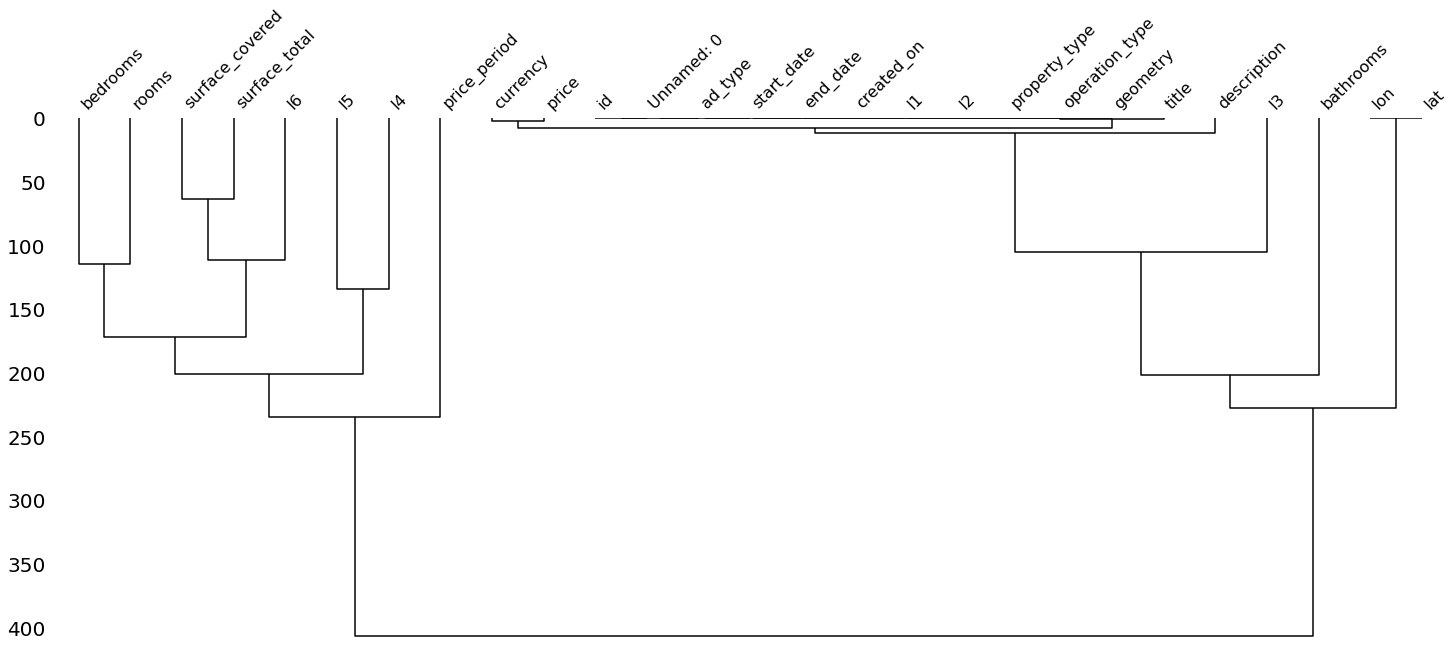

In [9]:
msno.dendrogram(df_train) 
#similar a un arbol que se genera a traves de la agrupacion jerarquica, agrupa columnas que tienen fuertes correlaciones y nulidad.

<AxesSubplot:>

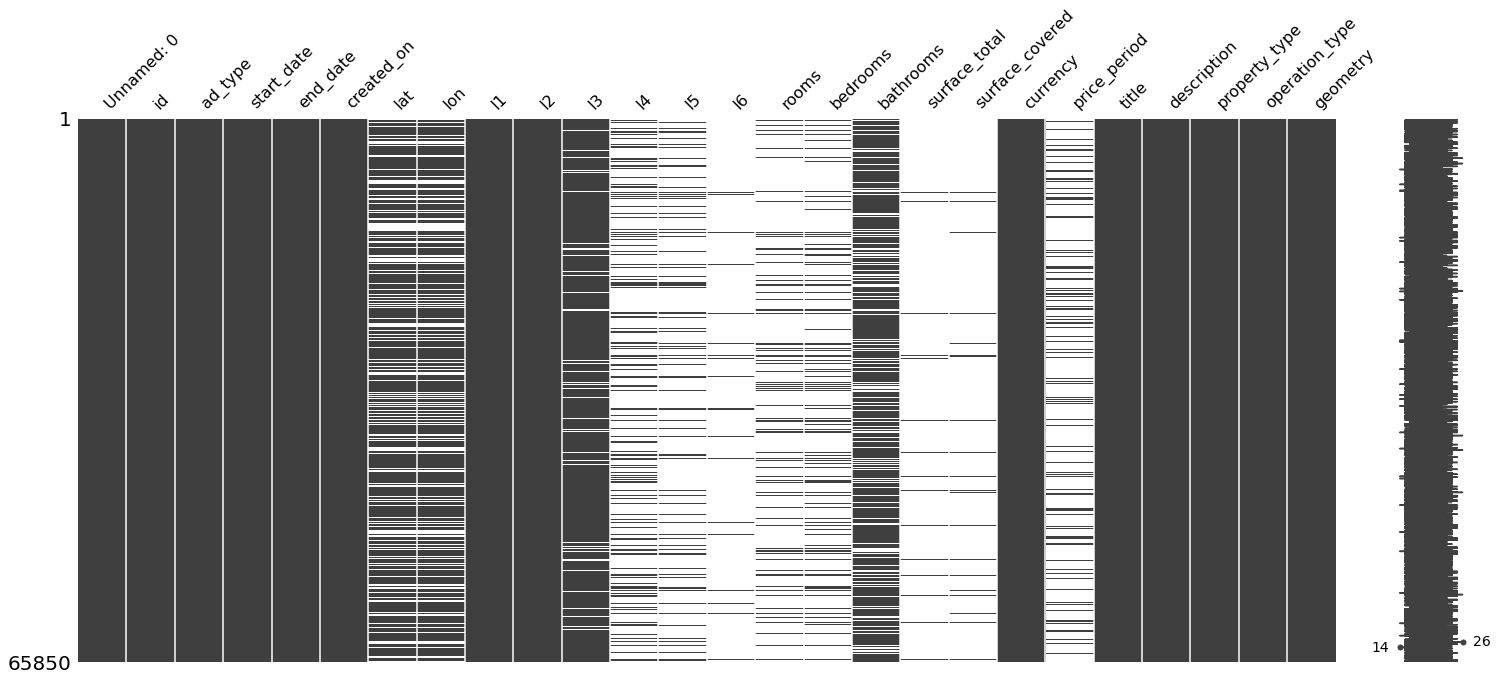

In [10]:
msno.matrix(df_test)
#podemos obsevar que de 26 columnas 14 son las que tienen los 65850 registros

<AxesSubplot:>

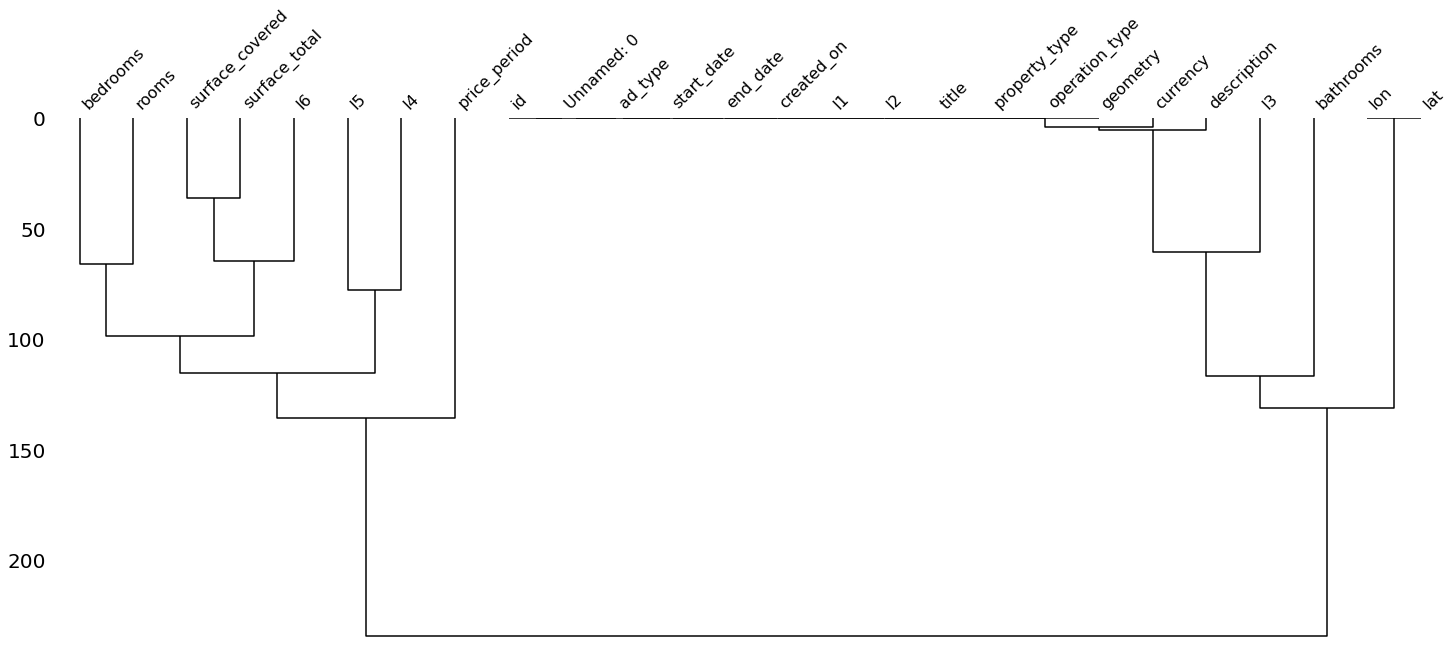

In [11]:
msno.dendrogram(df_test)
#similar a un arbol que se genera a traves de la agrupacion jerarquica, agrupa columnas que tienen fuertes correlaciones y nulidad.

*** Utilizamos info() nos describe qué tipo de elemento es, cuántos registros tiene y cuántas columnas***

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

***Viendo correlación para cada uno de los datas***

In [15]:
df_test.corr()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
Unnamed: 0,1.000000,0.091166,0.005351,0.013143,0.012648,0.006677,0.030018,-0.020263
lat,0.091166,1.000000,0.358578,-0.072772,-0.071651,-0.073043,0.011162,-0.017371
lon,0.005351,0.358578,1.000000,-0.079124,-0.035112,-0.019620,-0.023860,-0.028730
rooms,0.013143,-0.072772,-0.079124,1.000000,0.999697,0.614417,0.050858,-0.012893
bedrooms,0.012648,-0.071651,-0.035112,0.999697,1.000000,0.584761,0.042362,-0.009013
bathrooms,0.006677,-0.073043,-0.019620,0.614417,0.584761,1.000000,0.066725,0.001640
surface_total,0.030018,0.011162,-0.023860,0.050858,0.042362,0.066725,1.000000,0.006079
surface_covered,-0.020263,-0.017371,-0.028730,-0.012893,-0.009013,0.001640,0.006079,1.000000


***Hacemos un grafico para cada dataset***

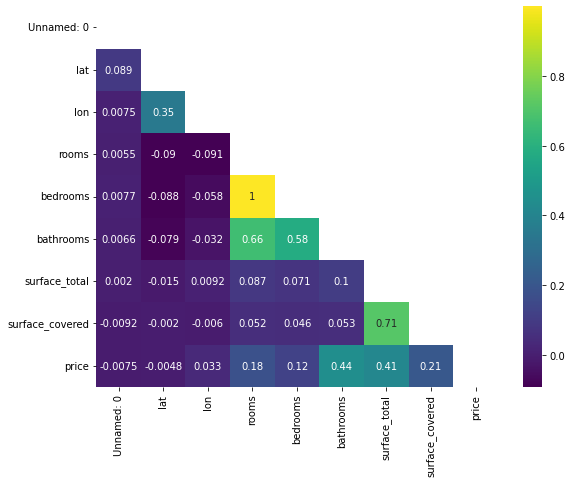

In [16]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df_train.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

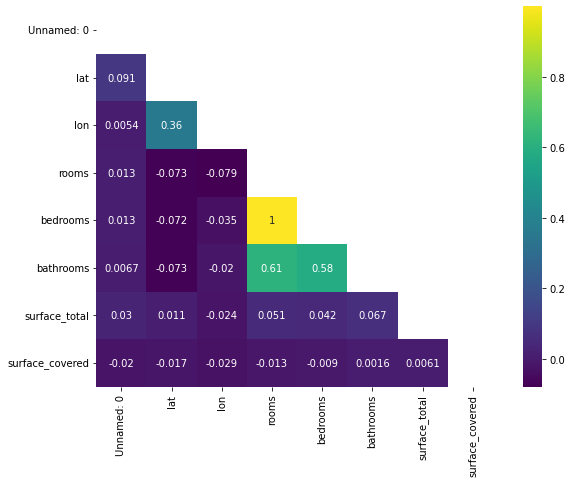

In [17]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df_test.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(9,7))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color, en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la parte central de la gráfica
ax = sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

***Grafico el heatmap de la matriz de correlacion***

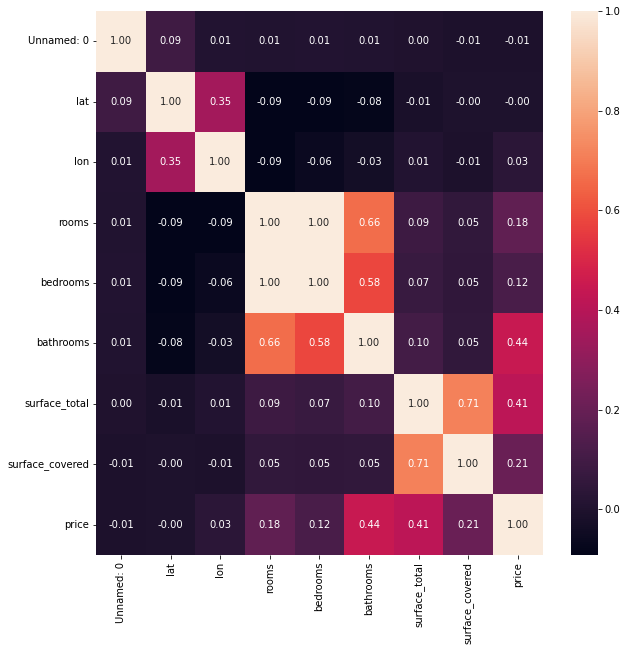

In [18]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

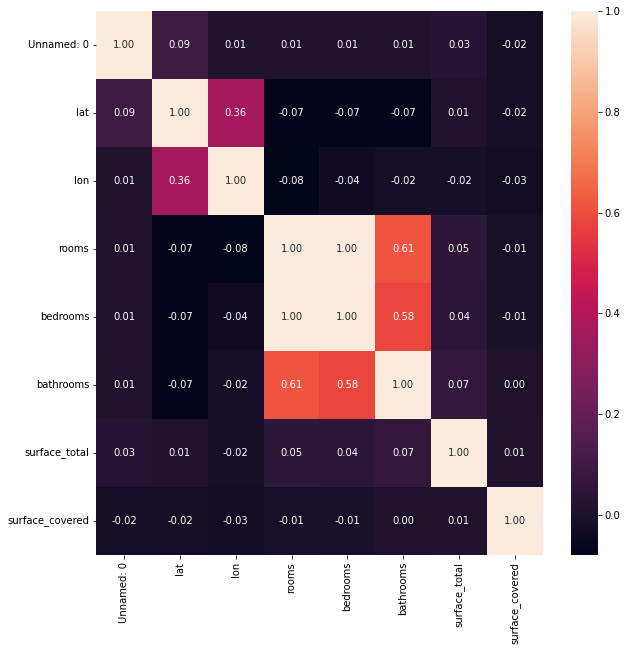

In [19]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_test.corr(), cbar=True, annot=True, fmt='.2f')
plt.show()

***Limpiando el df_train***

***Realizo un analisis exploratorio de la columna precio y obtendremos algunas observaciones***

In [3]:
prices = df_train['price']


In [4]:
# Minimo precio de la datatrain
minimum_price = np.amin(prices)

# Maximo precio de la datatrain
maximum_price = np.amax(prices)

# Media (Promedio) precio de la datatrain
mean_price = np.mean(prices)

# Mediana precio de la datatrain
median_price = np.median(prices)

# Desviacion estandar precio de la datatrain
std_price = np.std(prices)

# Mostrando las estadisiticas calculadas
print("Estadísticas para el conjunto de datos de Colombia en cuanto al precio:\n")
print("Precio minimo: ${}".format(minimum_price)) 
print("Precio maximo: ${}".format(maximum_price))
print("Precio promedio: ${}".format(mean_price))
print("Mediana precio ${}".format(median_price))
print("Desviación estándar de precios: ${}".format(std_price))

Estadísticas para el conjunto de datos de Colombia en cuanto al precio:

Precio minimo: $0.0
Precio maximo: $345000000000.0
Precio promedio: $643605091.0064613
Mediana precio $nan
Desviación estándar de precios: $1944862782.9184294


***Realizo la predicion de categorizacion en una nueva columna de las propiedades entre 0 = baratas o 1 = caras***

In [5]:
mean_price = int(df_train.price.mean())

df_train['Precio_categorico'] = df_train['price'].apply(lambda x: 1 if x > mean_price else 0)

df_train

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,Precio_categorico
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682),0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668),0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413),0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431),0


***Elimino las columnas que contengan muchos Nan y no tenga casi relevancia de acuerdo a la grafica de matrix de la libreria missingno con drop*** 

In [6]:
df_train = df_train.drop(['id','l4','l5', 'l6','start_date', 'end_date','Unnamed: 0', 'surface_total', 'price', 'price_period', 'surface_covered', 'geometry'], axis=1)
df_train

,ad_type,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,currency,title,description,property_type,operation_type,Precio_categorico
0,Propiedad,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,Medellín,NaN,4.0,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,1
1,Propiedad,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,NaN,3.0,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,0
2,Propiedad,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,0
3,Propiedad,2020-11-23,NaN,NaN,Colombia,Santander,Bucaramanga,NaN,NaN,1.0,COP,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,1
4,Propiedad,2020-10-06,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,2.0,COP,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,Propiedad,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,NaN,COP,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,0
197545,Propiedad,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,1.0,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,0
197546,Propiedad,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,NaN,NaN,1.0,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,0
197547,Propiedad,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,NaN,NaN,2.0,COP,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,0


In [7]:
#Verificamos si las columnas se eliminaron y vemos las cantidades de valores Nan de cada columna
df_train.isna().sum()

ad_type                   0
created_on                0
lat                   49498
lon                   49498
l1                        0
l2                        0
l3                    11032
rooms                170012
bedrooms             157024
bathrooms             41082
currency                 67
title                     1
description             121
property_type             0
operation_type            0
Precio_categorico         0
dtype: int64

***Llenando los valores faltantes con la media de cada columna, la funcion interpolate y con COP***

In [8]:
lat = df_train['lat']
meanlat = np.mean(lat)
df_train['lat'] = df_train['lat'].fillna(meanlat)

long = df_train['lon']
meanlon = np.mean(long)
df_train['lon'] = df_train['lon'].fillna(meanlon)

l_3 = df_train['l3']
df_train['l3'] = df_train['l3'].fillna('Sin Dato')

room = df_train['rooms']
meanrooms = np.mean(room)
df_train['rooms'] = df_train['rooms'].fillna(meanrooms)

bedroom = df_train['bedrooms']
meanbedrooms = np.mean(bedroom)
df_train['bedrooms'] = df_train['bedrooms'].fillna(meanbedrooms)

bathroom = df_train['bathrooms']
meanbathrooms = np.mean(bathroom)
df_train['bathrooms'] = df_train['bathrooms'].fillna(meanbathrooms)

curr = df_train['currency']
df_train['currency'] = df_train['currency'].fillna('COP')

tit = df_train['title']
df_train['title'] = df_train['title'].fillna('Sin Dato')

descrip = df_train['description']
df_train['description'] = df_train['description'].fillna('Sin Dato')

In [9]:
df_train = df_train.drop(['created_on', 'currency', 'title'], axis=1)


In [10]:
#Verificando los valores nulos
df_train.isna().sum()

ad_type              0
lat                  0
lon                  0
l1                   0
l2                   0
l3                   0
rooms                0
bedrooms             0
bathrooms            0
description          0
property_type        0
operation_type       0
Precio_categorico    0
dtype: int64

In [11]:
#verificando cuales son las variables categoricas
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ad_type            197549 non-null  object 
 1   lat                197549 non-null  float64
 2   lon                197549 non-null  float64
 3   l1                 197549 non-null  object 
 4   l2                 197549 non-null  object 
 5   l3                 197549 non-null  object 
 6   rooms              197549 non-null  float64
 7   bedrooms           197549 non-null  float64
 8   bathrooms          197549 non-null  float64
 9   description        197549 non-null  object 
 10  property_type      197549 non-null  object 
 11  operation_type     197549 non-null  object 
 12  Precio_categorico  197549 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 19.6+ MB


In [12]:
#Pasando las variables categoricas a numericas
df_train = pd.get_dummies(df_train, columns=['ad_type', 'property_type', 'operation_type', 'l2'], drop_first=True)


In [43]:
df_train.head(3)

,lat,lon,l1,l3,rooms,bedrooms,bathrooms,description,Precio_categorico,property_type_Casa,...,l2_Norte de Santander,l2_Putumayo,l2_Quindío,l2_Risaralda,l2_San Andrés Providencia y Santa Catalina,l2_Santander,l2_Sucre,l2_Tolima,l2_Valle del Cauca,l2_Vichada
0,6.203000,-75.572000,Colombia,Medellín,3.291208,4.000000,4.0,<b>Hermosa Mansión En El Poblado. Área Constru...,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.722748,-74.073115,Colombia,Bogotá D.C,3.291208,3.000000,2.0,Venta apartamento en piso 16 con vista exterio...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.709000,-74.030000,Colombia,Bogotá D.C,3.291208,3.239062,2.0,Al entrar a este bonito apartamento interior e...,0,1,...,0,0,0,0,0,0,0,0,0,0


***Limpiando el df_test***

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

In [13]:
df_test = df_test.drop(['id','l4','l5', 'l6','start_date', 'end_date','Unnamed: 0', 'surface_total','price_period', 'surface_covered', 'geometry', 'created_on', 'currency', 'title'], axis=1)
df_test

,ad_type,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,description,property_type,operation_type
0,Propiedad,4.722000,-74.075000,Colombia,Cundinamarca,Bogotá D.C,3.0,3.0,3.0,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta
1,Propiedad,NaN,NaN,Colombia,Antioquia,Envigado,NaN,NaN,3.0,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta
2,Propiedad,6.259253,-75.628381,Colombia,Antioquia,Medellín,NaN,NaN,1.0,"Casa compraventa escrituras en \n proceso,sala...",Casa,Venta
3,Propiedad,6.203000,-75.556000,Colombia,Antioquia,Medellín,NaN,NaN,NaN,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,Lote,Venta
4,Propiedad,NaN,NaN,Colombia,Antioquia,Medellín,NaN,NaN,2.0,Codigo Inmueble 505457 Casa en venta en el sec...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...
65845,Propiedad,6.212981,-75.599349,Colombia,Antioquia,Medellín,3.0,3.0,NaN,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",Apartamento,Venta
65846,Propiedad,5.041331,-75.512415,Colombia,Caldas,Manizales,NaN,NaN,1.0,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",Apartamento,Venta
65847,Propiedad,5.064733,-75.670570,Colombia,Caldas,Palestina,NaN,NaN,2.0,Casa campestre en conjunto cerrado de 4 alcoba...,Otro,Venta
65848,Propiedad,7.138641,-73.127312,Colombia,Santander,Bucaramanga,NaN,NaN,2.0,Vendo apto bien ubicado 3 habitación 2 baños s...,Apartamento,Venta


In [14]:
df_test.isna().sum()

ad_type               0
lat               16417
lon               16417
l1                    0
l2                    0
l3                 3657
rooms             56740
bedrooms          52447
bathrooms         13796
description          27
property_type         0
operation_type        0
dtype: int64

In [15]:
lat1 = df_test['lat']
meanlat1 = np.mean(lat1)
df_test['lat'] = df_test['lat'].fillna(meanlat1)

long1 = df_test['lon']
meanlon = np.mean(long1)
df_test['lon'] = df_test['lon'].fillna(meanlon)

l_3_1 = df_test['l3']
df_test['l3'] = df_test['l3'].fillna('Sin Dato')

room1 = df_test['rooms']
meanrooms1 = np.mean(room1)
df_test['rooms'] = df_test['rooms'].fillna(meanrooms1)

bedroom1 = df_test['bedrooms']
meanbedrooms1 = np.mean(bedroom1)
df_test['bedrooms'] = df_test['bedrooms'].fillna(meanbedrooms1)

bathroom1 = df_test['bathrooms']
meanbathrooms1 = np.mean(bathroom1)
df_test['bathrooms'] = df_test['bathrooms'].fillna(meanbathrooms1)



descrip1 = df_test['description']
df_test['description'] = df_test['description'].fillna('Sin Dato')

In [16]:
df_test.isna().sum()

ad_type           0
lat               0
lon               0
l1                0
l2                0
l3                0
rooms             0
bedrooms          0
bathrooms         0
description       0
property_type     0
operation_type    0
dtype: int64

In [17]:
#Pasando las variables categoricas a numericas
df_test = pd.get_dummies(df_test, columns=['ad_type', 'property_type', 'operation_type', 'l2'], drop_first=True)

In [54]:
df_test

,lat,lon,l1,l3,rooms,bedrooms,bathrooms,description,property_type_Casa,property_type_Finca,...,l2_Norte de Santander,l2_Putumayo,l2_Quindío,l2_Risaralda,l2_San Andrés Providencia y Santa Catalina,l2_Santander,l2_Sucre,l2_Tolima,l2_Valle del Cauca,l2_Vichada
0,4.722000,-74.075000,Colombia,Bogotá D.C,3.000000,3.000000,3.000000,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.686868,-75.042164,Colombia,Envigado,3.282327,3.236813,3.000000,"PR 7555. Apartamento Duplex en unidad cerrada,...",0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.259253,-75.628381,Colombia,Medellín,3.282327,3.236813,1.000000,"Casa compraventa escrituras en \n proceso,sala...",1,0,...,0,0,0,0,0,0,0,0,0,0
3,6.203000,-75.556000,Colombia,Medellín,3.282327,3.236813,2.639624,CODIGO 6330LOTE PARA LA VENTA DE 2793MTS,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.686868,-75.042164,Colombia,Medellín,3.282327,3.236813,2.000000,Codigo Inmueble 505457 Casa en venta en el sec...,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65845,6.212981,-75.599349,Colombia,Medellín,3.000000,3.000000,2.639624,"Área 90 m2, 3 alcobas, principal con baño, 2 b...",0,0,...,0,0,0,0,0,0,0,0,0,0
65846,5.041331,-75.512415,Colombia,Manizales,3.282327,3.236813,1.000000,"TRES ALCOBAS, SALA COMEDOR, ARMARIO, BAÑO, COC...",0,0,...,0,0,0,0,0,0,0,0,0,0
65847,5.064733,-75.670570,Colombia,Palestina,3.282327,3.236813,2.000000,Casa campestre en conjunto cerrado de 4 alcoba...,0,0,...,0,0,0,0,0,0,0,0,0,0
65848,7.138641,-73.127312,Colombia,Bucaramanga,3.282327,3.236813,2.000000,Vendo apto bien ubicado 3 habitación 2 baños s...,0,0,...,0,0,0,0,0,1,0,0,0,0


***Igualando la nueva columna en ambos datasets***

In [18]:
df_test['Precio_categorico'] = df_train['Precio_categorico']

In [19]:
df_train.shape

(197549, 46)

In [20]:
df_test.shape

(65850, 46)

***Eliminando en ambos datasets columnas***

In [21]:
df_train = df_train.drop(['l1', 'l3', 'description'], axis=1)

df_test = df_test.drop(['l1', 'l3', 'description'], axis=1)

In [22]:
df_train.shape

(197549, 43)

In [23]:
df_test.shape

(65850, 43)

In [63]:
df_train.head(3)

,lat,lon,rooms,bedrooms,bathrooms,Precio_categorico,property_type_Casa,property_type_Finca,property_type_Local comercial,property_type_Lote,...,l2_Norte de Santander,l2_Putumayo,l2_Quindío,l2_Risaralda,l2_San Andrés Providencia y Santa Catalina,l2_Santander,l2_Sucre,l2_Tolima,l2_Valle del Cauca,l2_Vichada
0,6.203000,-75.572000,3.291208,4.000000,4.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.722748,-74.073115,3.291208,3.000000,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.709000,-74.030000,3.291208,3.239062,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Sacando la correlacion con los datasets limpios***

<AxesSubplot:>

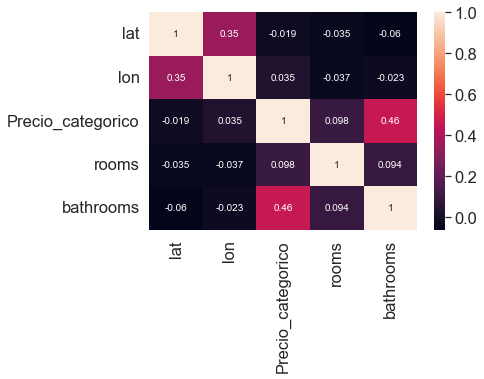

In [24]:
numeric_cols = ['lat', 'lon', 'Precio_categorico', 'rooms', 'bathrooms' ]
cm = np.corrcoef(df_train[numeric_cols].values.T)
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

***Entrenando Modelo de regresion logistica***

In [25]:
feature_cols =['rooms', 'bathrooms', 'property_type_Casa','property_type_Finca','property_type_Local comercial','property_type_Lote', 'property_type_Oficina', 'property_type_Otro',
                 'property_type_Parqueadero', 'lat', 'lon']

x = df_train.drop(['Precio_categorico'],axis=1)
y = df_train.Precio_categorico

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
y_pred.shape


(49388,)

In [29]:
#Cambiando el formato
prediccion = pd.DataFrame(y_pred, columns = ['pred'])

In [30]:
prediccion.to_csv('aleskafidas.csv', index = False)

***Sacando las metricas***

In [33]:
cm = confusion_matrix(y_test,y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print('recall:',round(recall,2))
print('accuracy:',round(accuracy,2))
print(cm)

recall: 0.42
accuracy: 0.82
[[35798  2201]
 [ 6616  4773]]
